In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('./export/coi.annotated.csv').set_index('date')
df.index = pd.DatetimeIndex(pd.to_datetime(df.index, errors='coerce'))
df.head()

document  \
date                                                   
2020-01-21  a9bc5a4f6338678152e11a257b1e6d2b971f584d   
2015-01-20  1f0a1c10096a116055ab95315b4f9ad07d0d259b   
2016-02-18  a2330c1f85c25812fa5c9619fe733fd7bcb66dfe   
2006-01-01  7978cd5cc609d037150a65b284c0d2c2d11fe564   
2013-08-13  e049d581e504e1f52fed1109eefec5b596426d40   

                                         publisher  has_conflict  
date                                                              
2020-01-21               Stem Cells (Dayton, Ohio)             0  
2015-01-20           BioMed Research International             0  
2016-02-18  Analytical and Bioanalytical Chemistry             0  
2006-01-01               Alcohol Research & Health             1  
2013-08-13                                PLoS ONE             0

## overall stats

In [3]:
# number of statements (aka articles with extracted coi statement)

assert len(df) == len(df['document'].unique())
len(df)

1152144

In [4]:
# first & last coi statement
df.index.min().date().isoformat(), df.index.max().date().isoformat()

('1999-08-05', '2020-12-31')

In [5]:
# conflict rate
df['has_conflict'].sum() / len(df)

0.10018105375716924

## statements over time

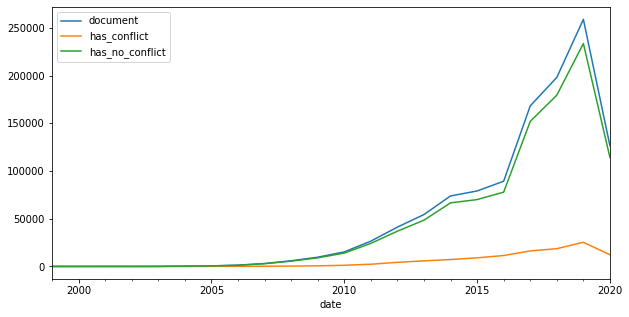

In [6]:
df['has_no_conflict'] = (df['has_conflict'] == 0).map(int)
df['has_conflict'] = (df['has_conflict'] == 1).map(int)
df.resample('1A')[['document', 'has_no_conflict', 'has_conflict']].agg({
    'document': 'count',
    'has_conflict': sum,
    'has_no_conflict': sum
}).plot(figsize=(10,5))

In [7]:
df_rate = df.resample('1A')[['document', 'has_no_conflict', 'has_conflict']].agg({
    'document': 'count',
    'has_conflict': sum,
    'has_no_conflict': sum
})
df_rate.head()

document  has_conflict  has_no_conflict
date                                               
1999-12-31         7             1                6
2000-12-31        14             4               10
2001-12-31        33             4               29
2002-12-31        19             3               16
2003-12-31        65             8               57

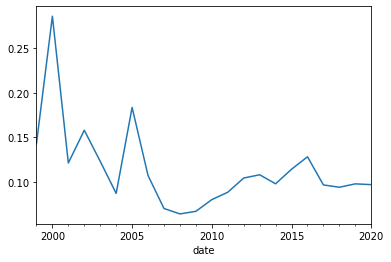

In [8]:
df_rate['rate'] = df_rate['has_conflict'] / df_rate['document']
df_rate['rate'].plot()